In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
!pip install statsmodels

In [ ]:
pip install pmdarima

In [ ]:
pip install numpy==1.24.3


In [33]:
import numpy as np

In [ ]:
pip install pmdarima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [17]:
stock_data = pd.read_csv("/content/sample_data/Download Data - STOCK_US_XNAS_ACGL.csv",
    sep=',',
    index_col='Date',
    parse_dates=['Date'],
    date_parser=lambda dates: pd.to_datetime(dates, format='mixed')).fillna(0)
stock_data

,Open,High,Low,Close,Volume
Date,,,,,
2025-06-05,94.99,95.44,94.13,94.57,"816,637"
2025-06-04,95.65,96.11,94.69,94.75,"871,838"
2025-06-03,95.82,96.79,94.05,95.82,"1,394,429"
2025-06-02,94.61,96.33,93.95,96.27,"1,423,356"
2025-05-30,92.36,95.59,91.16,95.04,"2,897,694"
...,...,...,...,...,...
2025-01-08,92.42,93.00,91.34,92.66,"1,698,097"
2025-01-07,90.74,93.25,90.58,92.25,"2,144,229"
2025-01-06,91.29,92.01,90.52,90.74,"1,790,965"


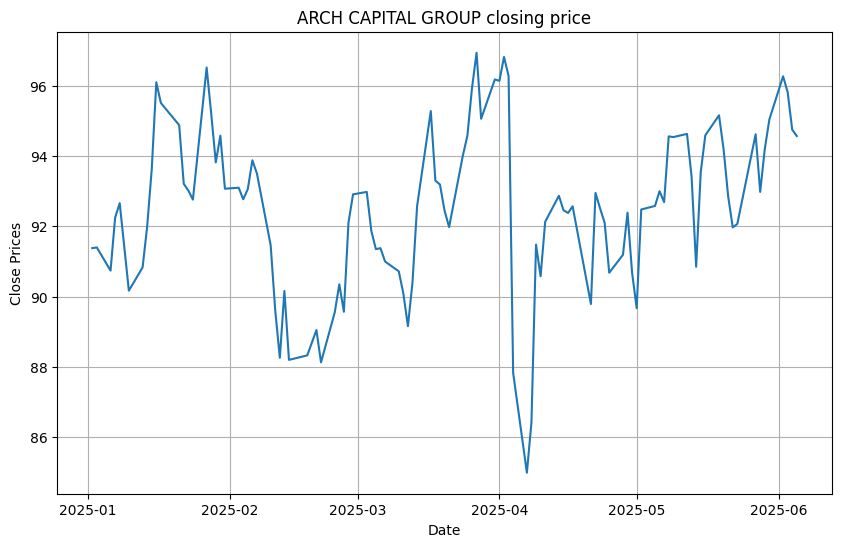

In [18]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

In [23]:
df1=stock_data

In [24]:
df1

,Open,High,Low,Close,Volume
Date,,,,,
2025-06-05,94.99,95.44,94.13,94.57,"816,637"
2025-06-04,95.65,96.11,94.69,94.75,"871,838"
2025-06-03,95.82,96.79,94.05,95.82,"1,394,429"
2025-06-02,94.61,96.33,93.95,96.27,"1,423,356"
2025-05-30,92.36,95.59,91.16,95.04,"2,897,694"
...,...,...,...,...,...
2025-01-08,92.42,93.00,91.34,92.66,"1,698,097"
2025-01-07,90.74,93.25,90.58,92.25,"2,144,229"
2025-01-06,91.29,92.01,90.52,90.74,"1,790,965"


<Axes: ylabel='Density'>

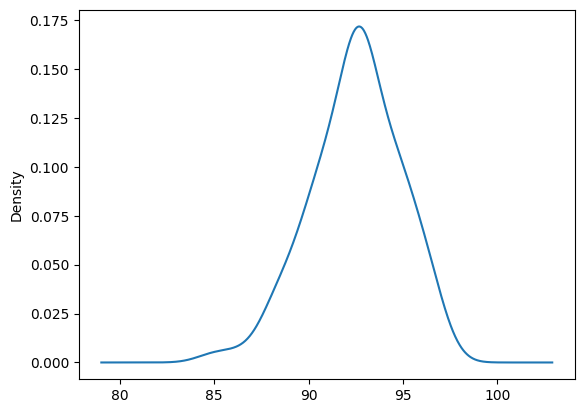

In [19]:
#Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')

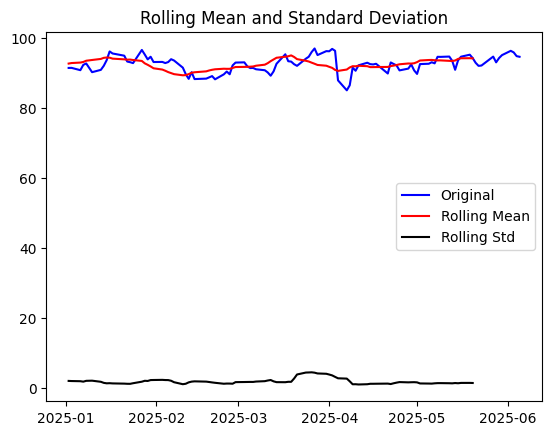

Results of dickey fuller test
Test Statistics                 -4.339637
p-value                          0.000379
No. of lags used                 1.000000
Number of observations used    104.000000
critical value (1%)             -3.494850
critical value (5%)             -2.889758
critical value (10%)            -2.581822
dtype: float64


In [20]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

In [21]:
df_close

,Close
Date,
2025-06-05,94.57
2025-06-04,94.75
2025-06-03,95.82
2025-06-02,96.27
2025-05-30,95.04
...,...
2025-01-08,92.66
2025-01-07,92.25
2025-01-06,90.74


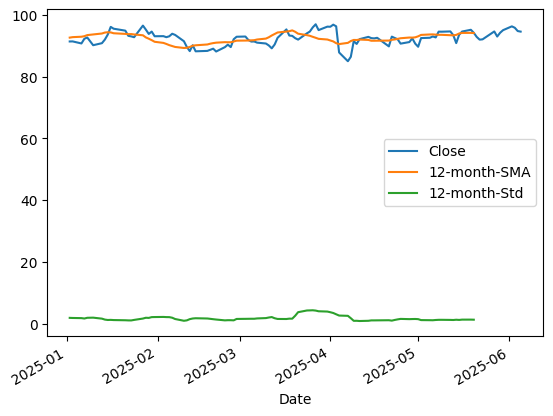

In [25]:
df1['12-month-SMA'] = df1['Close'].rolling(window=12).mean()
df1['12-month-Std'] = df1['Close'].rolling(window=12).std()

df1[['Close','12-month-SMA','12-month-Std']].plot();

In [26]:
dftest=adfuller(df1['Close'], autolag='AIC')
dftest

(-4.3396365597159825,
 0.00037901026440080235,
 1,
 104,
 {'1%': -3.4948504603223145,
  '5%': -2.889758398668639,
  '10%': -2.5818220155325444},
 349.7077635372208)

In [27]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
      

In [28]:
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

ADF test statistic       -4.339637
p-value                   0.000379
# lags used               1.000000
# observations          104.000000
critical value (1%)      -3.494850
critical value (5%)      -2.889758
critical value (10%)     -2.581822
dtype: float64


<Figure size 640x480 with 0 Axes>

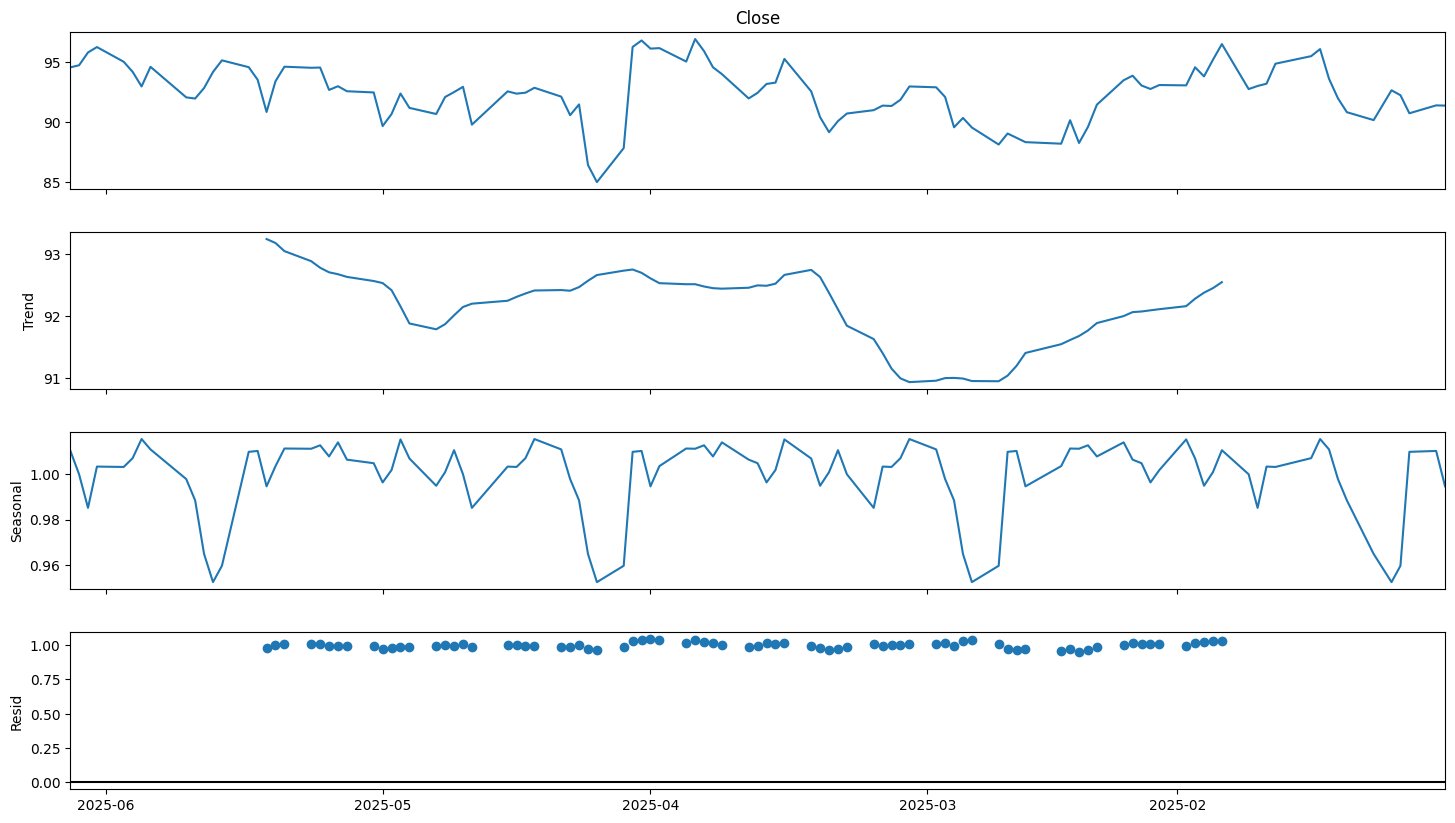

In [31]:
#although the data is stationary, we still try to remove the trend and seasonality
result = seasonal_decompose(df_close, model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

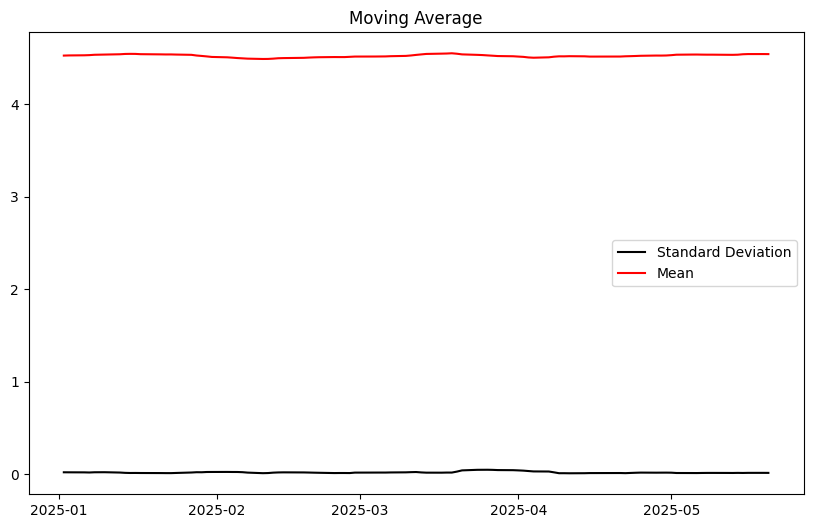

In [34]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

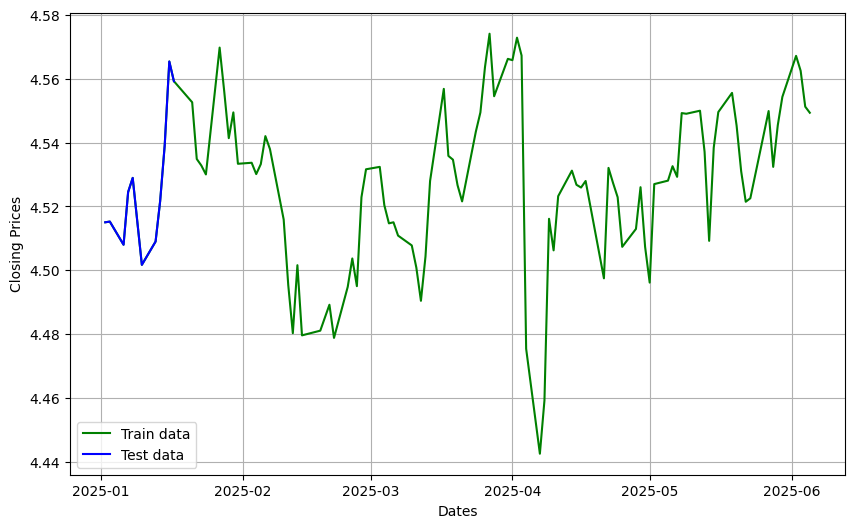

In [35]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-461.663, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-459.730, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-459.759, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-463.657, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-457.976, Time=0.57 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.453 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   92
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 232.828
Date:                Fri, 06 Jun 2025   AIC                           -463.657
Time:                        07:42:44   BIC                           -461.146
Sample:                             0   HQIC                          -462.644
                                 - 92                                       

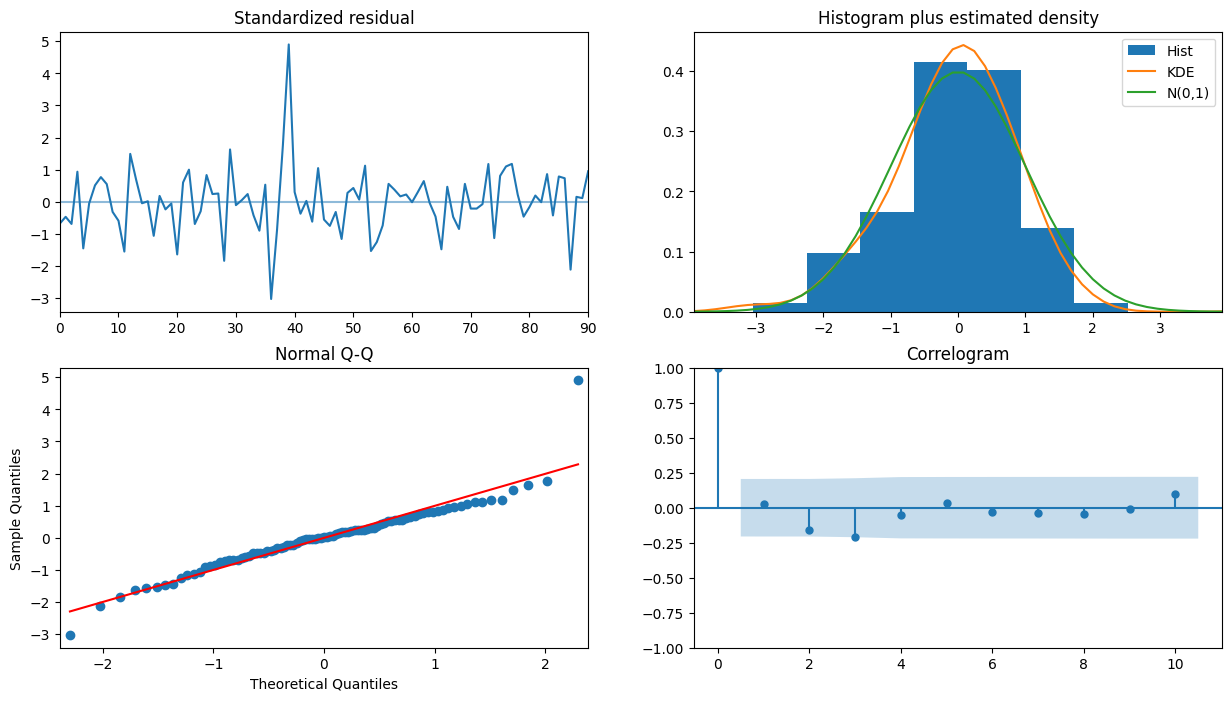

In [36]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [38]:
#Modeling
# Build Model
'''
model = ARIMA(train_data, order=(0,1,0))
fitted = model.fit()
print(fitted.summary())
'''

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   92
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 232.828
Date:                Fri, 06 Jun 2025   AIC                           -463.657
Time:                        08:04:05   BIC                           -461.146
Sample:                             0   HQIC                          -462.644
                                 - 92                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   2.69e-05     13.031      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               124.50
Prob(Q):                              0.79   Pr

In [53]:
model = auto_arima(train_data)
fc, conf = model.predict(n_periods=11, return_conf_int=True)

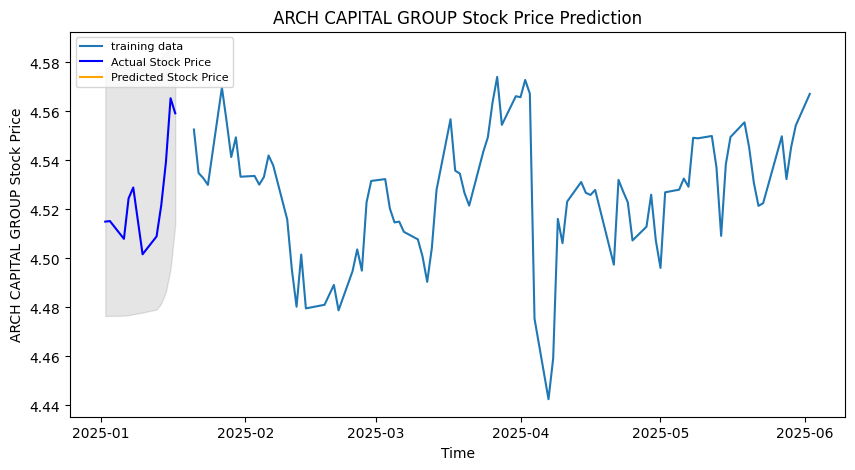

In [54]:
#forecasting stock prices with 95% confidence interval
# Forecast
'''
fc, conf = fitted.forecast(321, alpha=0.05)
'''
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)

lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [55]:
fc_series

,0
Date,
2025-01-17,NaN
2025-01-16,NaN
2025-01-15,NaN
2025-01-14,NaN
2025-01-13,NaN
2025-01-10,NaN
2025-01-08,NaN
2025-01-07,NaN
2025-01-06,NaN


In [56]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.0002462292846965759
MAE: 0.013273451142452071
RMSE: 0.0156916947681433
MAPE: nan
